# LunarLander

Name: Steven Lapp
ID: 204785240

Based on the following links to create this notebook:

https://colab.research.google.com/drive/18LdlDDT87eb8cCTHZsXyS9ksQPzL3i6H

https://colab.research.google.com/drive/1tug_bpg8RwrFOI8C6Ed-zo0OgD3yfnWy#scrollTo=bhsj7BTPHepg

https://colab.research.google.com/drive/1tug_bpg8RwrFOI8C6Ed-zo0OgD3yfnWy


To run Gym, you have to install prerequisites like xvbf,opengl & other python-dev packages using the following codes.

# Installs

In [1]:
!pip install gym 
!apt-get install python-opengl -y
!apt install xvfb -y
!pip install pyvirtualdisplay
!pip install piglet
!pip install gym[box2d]
!git clone https://github.com/openai/spinningup.git && cd spinningup && pip install -e . && cd ..

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 496 kB of archives.
After this operation, 5,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Fetched 496 kB in 1s (748 kB/s)
Selecting previously unselected package python-opengl.
(Reading database ... 146442 files and directories currently installed.)
Preparing to unpack .../python-opengl_3.1.0+dfsg-1_all.deb ...
Unpacking python-opengl (3.1.0+dfsg-1) ...
Setting up python-opengl (3.1.0+dfsg-1) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 784 kB of 

# Imports

In [2]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [3]:
# This code creates a virtual display to draw game images on. 
# If you are running locally, just ignore it
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

In [4]:
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) # error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

import argparse
import sys
sys.path.insert(0, "/content/spinningup")
from spinup.utils.test_policy import load_policy_and_env

from IPython import display as ipythondisplay

# Setup

In [5]:
"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  print(mp4list)
  if len(mp4list) > 0:
    for i in range(len(mp4list)):
      mp4 = mp4list[i]
      video = io.open(mp4, 'r+b').read()
      encoded = base64.b64encode(video)
      ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                  loop controls style="height: 400px;">
                  <source src="data:video/mp4;base64,{0}" type="video/mp4" />
              </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

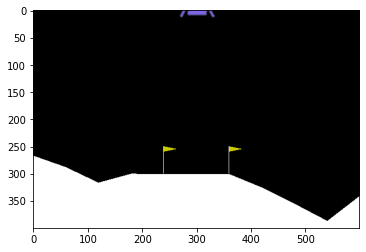

In [6]:
# Box2d Environment
env = gym.make('LunarLanderContinuous-v2')
env.reset()
plt.imshow(env.render('rgb_array'))


In [7]:
state_size = env.observation_space
print("state size is:", state_size)
a = env.action_space
print("action size=",a) 
state = env.reset()
print(state)   

state size is: Box(8,)
action size= Box(2,)
[-1.2569427e-03  1.4019556e+00 -1.2732239e-01 -3.9841798e-01
  1.4631932e-03  2.8840473e-02  0.0000000e+00  0.0000000e+00]


# Action Space
            #is two floats [main engine, left-right engines].
            # Main engine: -1..0 off, 0..+1 throttle from 50% to 100% power. Engine can't work with less than 50% power.
            # Left-right:  -1.0..-0.5 fire left engine, +0.5..+1.0 fire right engine, -0.5..0.5 off
            self.action_space = spaces.Box(-1, +1, (2,), dtype=np.float32)

# Train Agent

In [8]:
#command line

!python -m spinup.run ppo --exp_name LunarLanderx1 --env LunarLanderContinuous-v2 --clip_ratio 0.2 --hid "[128,64]" --gamma 0.999 --vf_lr 0.0024 --seed 20 --epochs 150 --pi_lr 0.0002 --target_kl 0.005 --data_dir /path --dt

#Test the Agent
#python -m spinup.run test_policy /path



Using default backend (pytorch) for ppo.

ExperimentGrid [LunarLanderx1] runs over parameters:

 clip_ratio                               [cli] 

	0.2

 gamma                                    [gam] 

	0.999

 vf_lr                                    [vf] 

	0.0024

 seed                                     [see] 

	20

 epochs                                   [epo] 

	150

 pi_lr                                    [pi] 

	0.0002

 target_kl                                [tar] 

	0.005

 env_name                                 [env] 

	LunarLanderContinuous-v2

 ac_kwargs:hidden_sizes                   [ac-hid] 

	[128, 64]

 Variants, counting seeds:               1
 Variants, not counting seeds:           1


Preparing to run the following experiments...

LunarLanderx1


Launch delayed to give you a few seconds to review your experiments.

To customize or disable this behavior, change WAIT_BEFORE_LAUNCH in
spinup/user_config.py.

Running experiment:

LunarLanderx1

with kwargs:

# Test Agent

In [9]:
for idx,(dirpath, dirnames, filenames) in enumerate(os.walk("/path")):
    if idx == 2:
      break
dirpath

'/path/2021-02-09_LunarLanderx1/2021-02-09_16-43-32-LunarLanderx1_s20'

In [10]:
!ls {dirpath}

config.json  progress.txt  pyt_save  vars.pkl


Plotting from...

/path/2021-02-09_LunarLanderx1/2021-02-09_16-43-32-LunarLanderx1_s20



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


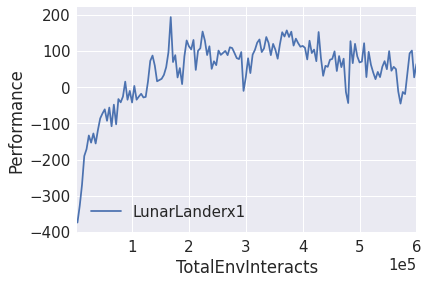

In [11]:
# Plot results from this run with:
from spinup.utils.plot import make_plots

parser = argparse.ArgumentParser()
parser.add_argument('logdir', nargs='*')
parser.add_argument('--legend', '-l', nargs='*')
parser.add_argument('--xaxis', '-x', default='TotalEnvInteracts')
parser.add_argument('--value', '-y', default='Performance', nargs='*')
parser.add_argument('--count', action='store_true')
parser.add_argument('--smooth', '-s', type=int, default=1)
parser.add_argument('--select', nargs='*')
parser.add_argument('--exclude', nargs='*')
parser.add_argument('--est', default='mean')
args,_ = parser.parse_known_args()


args.logdir=[dirpath]
make_plots(args.logdir, args.legend, args.xaxis, args.value, args.count, 
            smooth=args.smooth, select=args.select, exclude=args.exclude,
            estimator=args.est)


In [12]:
# Watch the trained agent with:

# !python -m spinup.run test_policy {dirpath}

In [13]:
parser = argparse.ArgumentParser()
parser.add_argument('fpath', type=str)
parser.add_argument('--len', '-l', type=int, default=0)
parser.add_argument('--episodes', '-n', type=int, default=100)
parser.add_argument('--norender', '-nr', action='store_true')
parser.add_argument('--itr', '-i', type=int, default=-1)
parser.add_argument('--deterministic', '-d', action='store_true')
args,_ = parser.parse_known_args()

_, get_action = load_policy_and_env(dirpath, 
                                      args.itr if args.itr >=0 else 'last',
                                      args.deterministic)



Loading from /path/2021-02-09_LunarLanderx1/2021-02-09_16-43-32-LunarLanderx1_s20/pyt_save/model.pt.




In [14]:
env = gym.make('LunarLanderContinuous-v2')

env = wrap_env(env)

games_count = 10
for _ in range(games_count):
    done = False
    iter = 0
    # print(done)
    state = env.reset()

    action = 1
    TotalReward = 0;
    while not done:
      iter +=1
      action = get_action(state)
      # print("action is:",action)
      state, reward, done, _ = env.step(action)
      TotalReward +=reward
      #print("state is:", state)

      #if you want to see results on real-time 'open' the following 4 lines
      # screen = env.render(mode='rgb_array')
      # plt.imshow(screen)
      # ipythondisplay.clear_output(wait=True)
      # ipythondisplay.display(plt.gcf())
    print("TotalReward:",TotalReward)

env.close()

TotalReward: 135.37375762617373
TotalReward: 47.228467330088876
TotalReward: 71.04359309313219
TotalReward: 69.48643047539672
TotalReward: 36.263461871508014
TotalReward: 100.8511967733938
TotalReward: 172.43598243360492
TotalReward: 137.82174696336062
TotalReward: 19.94719179265452
TotalReward: 183.86242924869333


In [15]:
show_video()

['video/openaigym.video.0.61.video000001.mp4', 'video/openaigym.video.0.61.video000000.mp4', 'video/openaigym.video.0.61.video000008.mp4']
